## TCS iON RIO-125: HR Salary Dashboard - Train the Dataset and Predict Salary 

### Problem Statement

The objective of this project is to build a salary prediction dashboard of HRs.

### 1. Import Libraries
Let us import the required libraries and functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px

#To ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install helpers

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### 2. Loading the dataset
Read and display data to get insights from the data

In [3]:
data=pd.read_csv(r"C:\Users\amani\Downloads\salarydata.csv")

In [4]:
data

age         workclass   education  education-num      marital-status  \
0       39         State-gov   Bachelors             13       Never-married   
1       50  Self-emp-not-inc   Bachelors             13  Married-civ-spouse   
2       38           Private     HS-grad              9            Divorced   
3       53           Private        11th              7  Married-civ-spouse   
4       28           Private   Bachelors             13  Married-civ-spouse   
...    ...               ...         ...            ...                 ...   
32556   27           Private  Assoc-acdm             12  Married-civ-spouse   
32557   40           Private     HS-grad              9  Married-civ-spouse   
32558   58           Private     HS-grad              9             Widowed   
32559   22           Private     HS-grad              9       Never-married   
32560   52      Self-emp-inc     HS-grad              9  Married-civ-spouse   

              occupation   relationship   race     sex  capital-gain  \
0           Adm-clerical  Not-in-family  White    Male          2174   
1        Exec-managerial        Husband  White    Male             0   
2      Handlers-cleaners  Not-in-family  White    Male             0   
3      Handlers-cleaners        Husband  Black    Male             0   
4         Prof-specialty           Wife  Black  Female             0   
...                  ...            ...    ...     ...           ...   
32556       Tech-support           Wife  White  Female             0   
32557  Machine-op-inspct        Husband  White    Male             0   
32558       Adm-clerical      Unmarried  White  Female             0   
32559       Adm-clerical      Own-child  White    Male             0   
32560    Exec-managerial           Wife  White  Female         15024   

       capital-loss  hours-per-week native-country salary  
0                 0              40  United-States  <=50K  
1                 0              13  United-States  <=50K  
2                 0              40  United-States  <=50K  
3                 0              40  United-States  <=50K  
4                 0              40           Cuba  <=50K  
...             ...             ...            ...    ...  
32556             0              38  United-States  <=50K  
32557             0              40  United-States   >50K  
32558             0              40  United-States  <=50K  
32559             0              20  United-States  <=50K  
32560             0              40  United-States   >50K  

[32561 rows x 14 columns]

### 3.Checking the Basic details of Dataset

In [5]:
def data_info(data):
    print('Number of Columns in the dataset: ',data.shape[1])
    print('Number of rows in the dataset: ',data.shape[0])
    print('Total number of datapoints in the dataset:',data.size)
    numerical_features = [f for f in data.columns if data[f].dtypes!='O']
    print('Count of Numerical Features:',len(numerical_features))
    cat_features = [c for c in data.columns if data[c].dtypes=='O']
    print('Count of Categorical Features:',len(cat_features))
data_info(data)

Number of Columns in the dataset:  14
Number of rows in the dataset:  32561
Total number of datapoints in the dataset: 455854
Count of Numerical Features: 5
Count of Categorical Features: 9


In [6]:
#Check dimensions
data.shape

(32561, 14)

#### Note : We see the dataframe has 14 columns and 32,561 observations.

In [7]:
#Summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [8]:
#Check datatypes
data.dtypes

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [9]:
#Summary Statistics of numerical variables
data.describe()

age  education-num  capital-gain  capital-loss  hours-per-week
count  32561.000000   32561.000000  32561.000000  32561.000000    32561.000000
mean      38.581647      10.080679   1077.648844     87.303830       40.437456
std       13.640433       2.572720   7385.292085    402.960219       12.347429
min       17.000000       1.000000      0.000000      0.000000        1.000000
25%       28.000000       9.000000      0.000000      0.000000       40.000000
50%       37.000000      10.000000      0.000000      0.000000       40.000000
75%       48.000000      12.000000      0.000000      0.000000       45.000000
max       90.000000      16.000000  99999.000000   4356.000000       99.000000

The above output illustrates the summary statistics of all the numeric variables like the mean, median(50%), minimum, and maximum values, along with the standard deviation.

In [10]:
#Find the columns with ? symbol & Replace with NaN
data.isin(['?']).sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [11]:
data = data.replace(to_replace='?', value=np.nan)

In [12]:
data

age         workclass   education  education-num      marital-status  \
0       39         State-gov   Bachelors             13       Never-married   
1       50  Self-emp-not-inc   Bachelors             13  Married-civ-spouse   
2       38           Private     HS-grad              9            Divorced   
3       53           Private        11th              7  Married-civ-spouse   
4       28           Private   Bachelors             13  Married-civ-spouse   
...    ...               ...         ...            ...                 ...   
32556   27           Private  Assoc-acdm             12  Married-civ-spouse   
32557   40           Private     HS-grad              9  Married-civ-spouse   
32558   58           Private     HS-grad              9             Widowed   
32559   22           Private     HS-grad              9       Never-married   
32560   52      Self-emp-inc     HS-grad              9  Married-civ-spouse   

              occupation   relationship   race     sex  capital-gain  \
0           Adm-clerical  Not-in-family  White    Male          2174   
1        Exec-managerial        Husband  White    Male             0   
2      Handlers-cleaners  Not-in-family  White    Male             0   
3      Handlers-cleaners        Husband  Black    Male             0   
4         Prof-specialty           Wife  Black  Female             0   
...                  ...            ...    ...     ...           ...   
32556       Tech-support           Wife  White  Female             0   
32557  Machine-op-inspct        Husband  White    Male             0   
32558       Adm-clerical      Unmarried  White  Female             0   
32559       Adm-clerical      Own-child  White    Male             0   
32560    Exec-managerial           Wife  White  Female         15024   

       capital-loss  hours-per-week native-country salary  
0                 0              40  United-States  <=50K  
1                 0              13  United-States  <=50K  
2                 0              40  United-States  <=50K  
3                 0              40  United-States  <=50K  
4                 0              40           Cuba  <=50K  
...             ...             ...            ...    ...  
32556             0              38  United-States  <=50K  
32557             0              40  United-States   >50K  
32558             0              40  United-States  <=50K  
32559             0              20  United-States  <=50K  
32560             0              40  United-States   >50K  

[32561 rows x 14 columns]

In [13]:
#trimming all whitespace across every column in dataframe
data=data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [14]:
data

age         workclass   education  education-num      marital-status  \
0       39         State-gov   Bachelors             13       Never-married   
1       50  Self-emp-not-inc   Bachelors             13  Married-civ-spouse   
2       38           Private     HS-grad              9            Divorced   
3       53           Private        11th              7  Married-civ-spouse   
4       28           Private   Bachelors             13  Married-civ-spouse   
...    ...               ...         ...            ...                 ...   
32556   27           Private  Assoc-acdm             12  Married-civ-spouse   
32557   40           Private     HS-grad              9  Married-civ-spouse   
32558   58           Private     HS-grad              9             Widowed   
32559   22           Private     HS-grad              9       Never-married   
32560   52      Self-emp-inc     HS-grad              9  Married-civ-spouse   

              occupation   relationship   race     sex  capital-gain  \
0           Adm-clerical  Not-in-family  White    Male          2174   
1        Exec-managerial        Husband  White    Male             0   
2      Handlers-cleaners  Not-in-family  White    Male             0   
3      Handlers-cleaners        Husband  Black    Male             0   
4         Prof-specialty           Wife  Black  Female             0   
...                  ...            ...    ...     ...           ...   
32556       Tech-support           Wife  White  Female             0   
32557  Machine-op-inspct        Husband  White    Male             0   
32558       Adm-clerical      Unmarried  White  Female             0   
32559       Adm-clerical      Own-child  White    Male             0   
32560    Exec-managerial           Wife  White  Female         15024   

       capital-loss  hours-per-week native-country salary  
0                 0              40  United-States  <=50K  
1                 0              13  United-States  <=50K  
2                 0              40  United-States  <=50K  
3                 0              40  United-States  <=50K  
4                 0              40           Cuba  <=50K  
...             ...             ...            ...    ...  
32556             0              38  United-States  <=50K  
32557             0              40  United-States   >50K  
32558             0              40  United-States  <=50K  
32559             0              20  United-States  <=50K  
32560             0              40  United-States   >50K  

[32561 rows x 14 columns]

In [15]:
#Replace Salary column with 0 & 1
data['salary'] = data['salary'].replace({'<=50K':0,'>50K':1})

In [16]:
data.describe(include='all')

age workclass education  education-num      marital-status  \
count   32561.000000     30725     32561   32561.000000               32561   
unique           NaN         8        16            NaN                   7   
top              NaN   Private   HS-grad            NaN  Married-civ-spouse   
freq             NaN     22696     10501            NaN               14976   
mean       38.581647       NaN       NaN      10.080679                 NaN   
std        13.640433       NaN       NaN       2.572720                 NaN   
min        17.000000       NaN       NaN       1.000000                 NaN   
25%        28.000000       NaN       NaN       9.000000                 NaN   
50%        37.000000       NaN       NaN      10.000000                 NaN   
75%        48.000000       NaN       NaN      12.000000                 NaN   
max        90.000000       NaN       NaN      16.000000                 NaN   

            occupation relationship   race    sex  capital-gain  capital-loss  \
count            30718        32561  32561  32561  32561.000000  32561.000000   
unique              14            6      5      2           NaN           NaN   
top     Prof-specialty      Husband  White   Male           NaN           NaN   
freq              4140        13193  27816  21790           NaN           NaN   
mean               NaN          NaN    NaN    NaN   1077.648844     87.303830   
std                NaN          NaN    NaN    NaN   7385.292085    402.960219   
min                NaN          NaN    NaN    NaN      0.000000      0.000000   
25%                NaN          NaN    NaN    NaN      0.000000      0.000000   
50%                NaN          NaN    NaN    NaN      0.000000      0.000000   
75%                NaN          NaN    NaN    NaN      0.000000      0.000000   
max                NaN          NaN    NaN    NaN  99999.000000   4356.000000   

        hours-per-week native-country        salary  
count     32561.000000          31978  32561.000000  
unique             NaN             41           NaN  
top                NaN  United-States           NaN  
freq               NaN          29170           NaN  
mean         40.437456            NaN      0.240810  
std          12.347429            NaN      0.427581  
min           1.000000            NaN      0.000000  
25%          40.000000            NaN      0.000000  
50%          40.000000            NaN      0.000000  
75%          45.000000            NaN      0.000000  
max          99.000000            NaN      1.000000

In [17]:
data.describe()

age  education-num  capital-gain  capital-loss  \
count  32561.000000   32561.000000  32561.000000  32561.000000   
mean      38.581647      10.080679   1077.648844     87.303830   
std       13.640433       2.572720   7385.292085    402.960219   
min       17.000000       1.000000      0.000000      0.000000   
25%       28.000000       9.000000      0.000000      0.000000   
50%       37.000000      10.000000      0.000000      0.000000   
75%       48.000000      12.000000      0.000000      0.000000   
max       90.000000      16.000000  99999.000000   4356.000000   

       hours-per-week        salary  
count    32561.000000  32561.000000  
mean        40.437456      0.240810  
std         12.347429      0.427581  
min          1.000000      0.000000  
25%         40.000000      0.000000  
50%         40.000000      0.000000  
75%         45.000000      0.000000  
max         99.000000      1.000000

In [18]:
data.describe(include=object)

workclass education      marital-status      occupation relationship  \
count      30725     32561               32561           30718        32561   
unique         8        16                   7              14            6   
top      Private   HS-grad  Married-civ-spouse  Prof-specialty      Husband   
freq       22696     10501               14976            4140        13193   

         race    sex native-country  
count   32561  32561          31978  
unique      5      2             41  
top     White   Male  United-States  
freq    27816  21790          29170

In [19]:
#Check unique values
uniq= pd.DataFrame(data.nunique(),columns=['Unique Values'])
uniq

Unique Values
age                        73
workclass                   8
education                  16
education-num              16
marital-status              7
occupation                 14
relationship                6
race                        5
sex                         2
capital-gain              119
capital-loss               92
hours-per-week             94
native-country             41
salary                      2

In [20]:
#Check missing values
data.isna().sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [21]:
Total = data.isnull().sum().sort_values(ascending=False) 
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])
missing_data

Total  Percentage of Missing Values
occupation       1843                      5.660146
workclass        1836                      5.638647
native-country    583                      1.790486
age                 0                      0.000000
education           0                      0.000000
education-num       0                      0.000000
marital-status      0                      0.000000
relationship        0                      0.000000
race                0                      0.000000
sex                 0                      0.000000
capital-gain        0                      0.000000
capital-loss        0                      0.000000
hours-per-week      0                      0.000000
salary              0                      0.000000

In [22]:
numeric_features = data.select_dtypes(include=np.number)
numeric_features.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'salary'],
      dtype='object')

In [23]:
categoric_features = data.select_dtypes(include='object')
categoric_features.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [24]:
#Handling missing values
msv_col = ['workclass','occupation','native-country']
for col in msv_col:
    data[col] = data[col].fillna(data[col].mode()[0])

In [25]:
data

age         workclass   education  education-num      marital-status  \
0       39         State-gov   Bachelors             13       Never-married   
1       50  Self-emp-not-inc   Bachelors             13  Married-civ-spouse   
2       38           Private     HS-grad              9            Divorced   
3       53           Private        11th              7  Married-civ-spouse   
4       28           Private   Bachelors             13  Married-civ-spouse   
...    ...               ...         ...            ...                 ...   
32556   27           Private  Assoc-acdm             12  Married-civ-spouse   
32557   40           Private     HS-grad              9  Married-civ-spouse   
32558   58           Private     HS-grad              9             Widowed   
32559   22           Private     HS-grad              9       Never-married   
32560   52      Self-emp-inc     HS-grad              9  Married-civ-spouse   

              occupation   relationship   race     sex  capital-gain  \
0           Adm-clerical  Not-in-family  White    Male          2174   
1        Exec-managerial        Husband  White    Male             0   
2      Handlers-cleaners  Not-in-family  White    Male             0   
3      Handlers-cleaners        Husband  Black    Male             0   
4         Prof-specialty           Wife  Black  Female             0   
...                  ...            ...    ...     ...           ...   
32556       Tech-support           Wife  White  Female             0   
32557  Machine-op-inspct        Husband  White    Male             0   
32558       Adm-clerical      Unmarried  White  Female             0   
32559       Adm-clerical      Own-child  White    Male             0   
32560    Exec-managerial           Wife  White  Female         15024   

       capital-loss  hours-per-week native-country  salary  
0                 0              40  United-States       0  
1                 0              13  United-States       0  
2                 0              40  United-States       0  
3                 0              40  United-States       0  
4                 0              40           Cuba       0  
...             ...             ...            ...     ...  
32556             0              38  United-States       0  
32557             0              40  United-States       1  
32558             0              40  United-States       0  
32559             0              20  United-States       0  
32560             0              40  United-States       1  

[32561 rows x 14 columns]

In [26]:
data.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [27]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary'],
      dtype='object')

In [28]:
#Here we are removing the three columns, capital gain, capital loss,and education-num
data.drop(['capital-gain','capital-loss','education-num'], axis = 1,inplace = True)

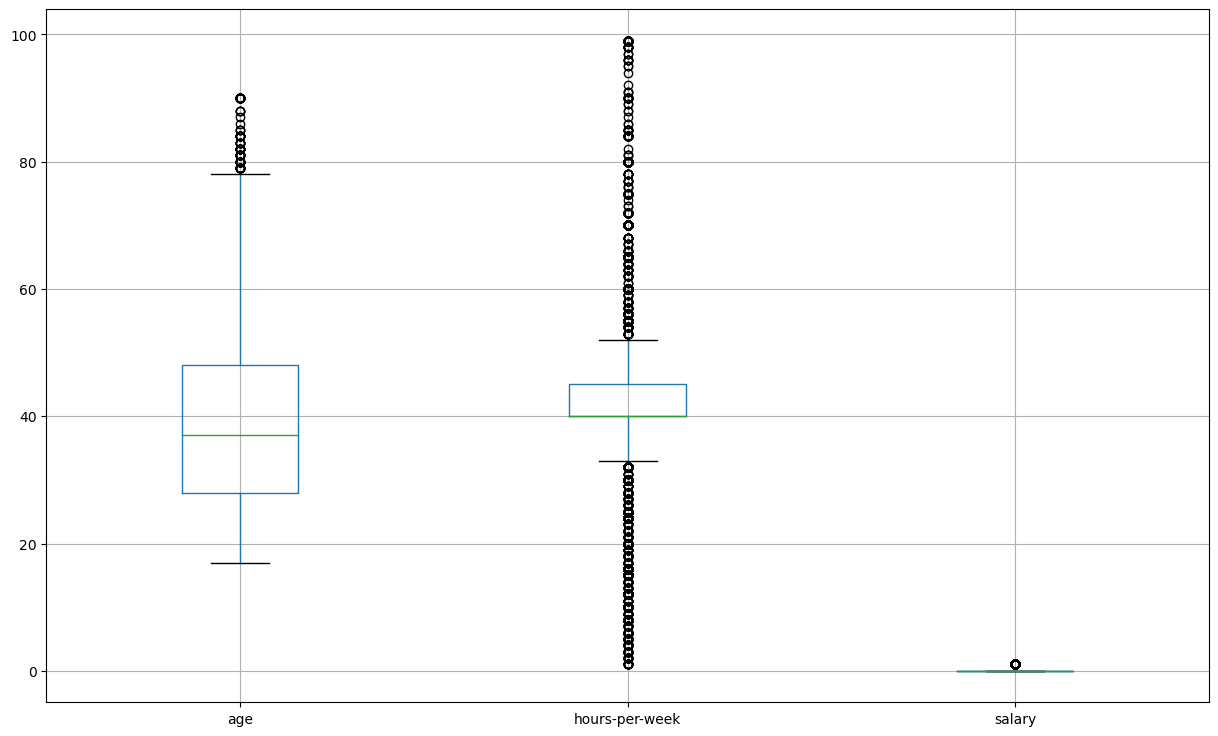

In [29]:
plt.rcParams['figure.figsize']=(15,9)
numeric_features.boxplot(column = ['age', 'hours-per-week', 'salary'])
plt.show()

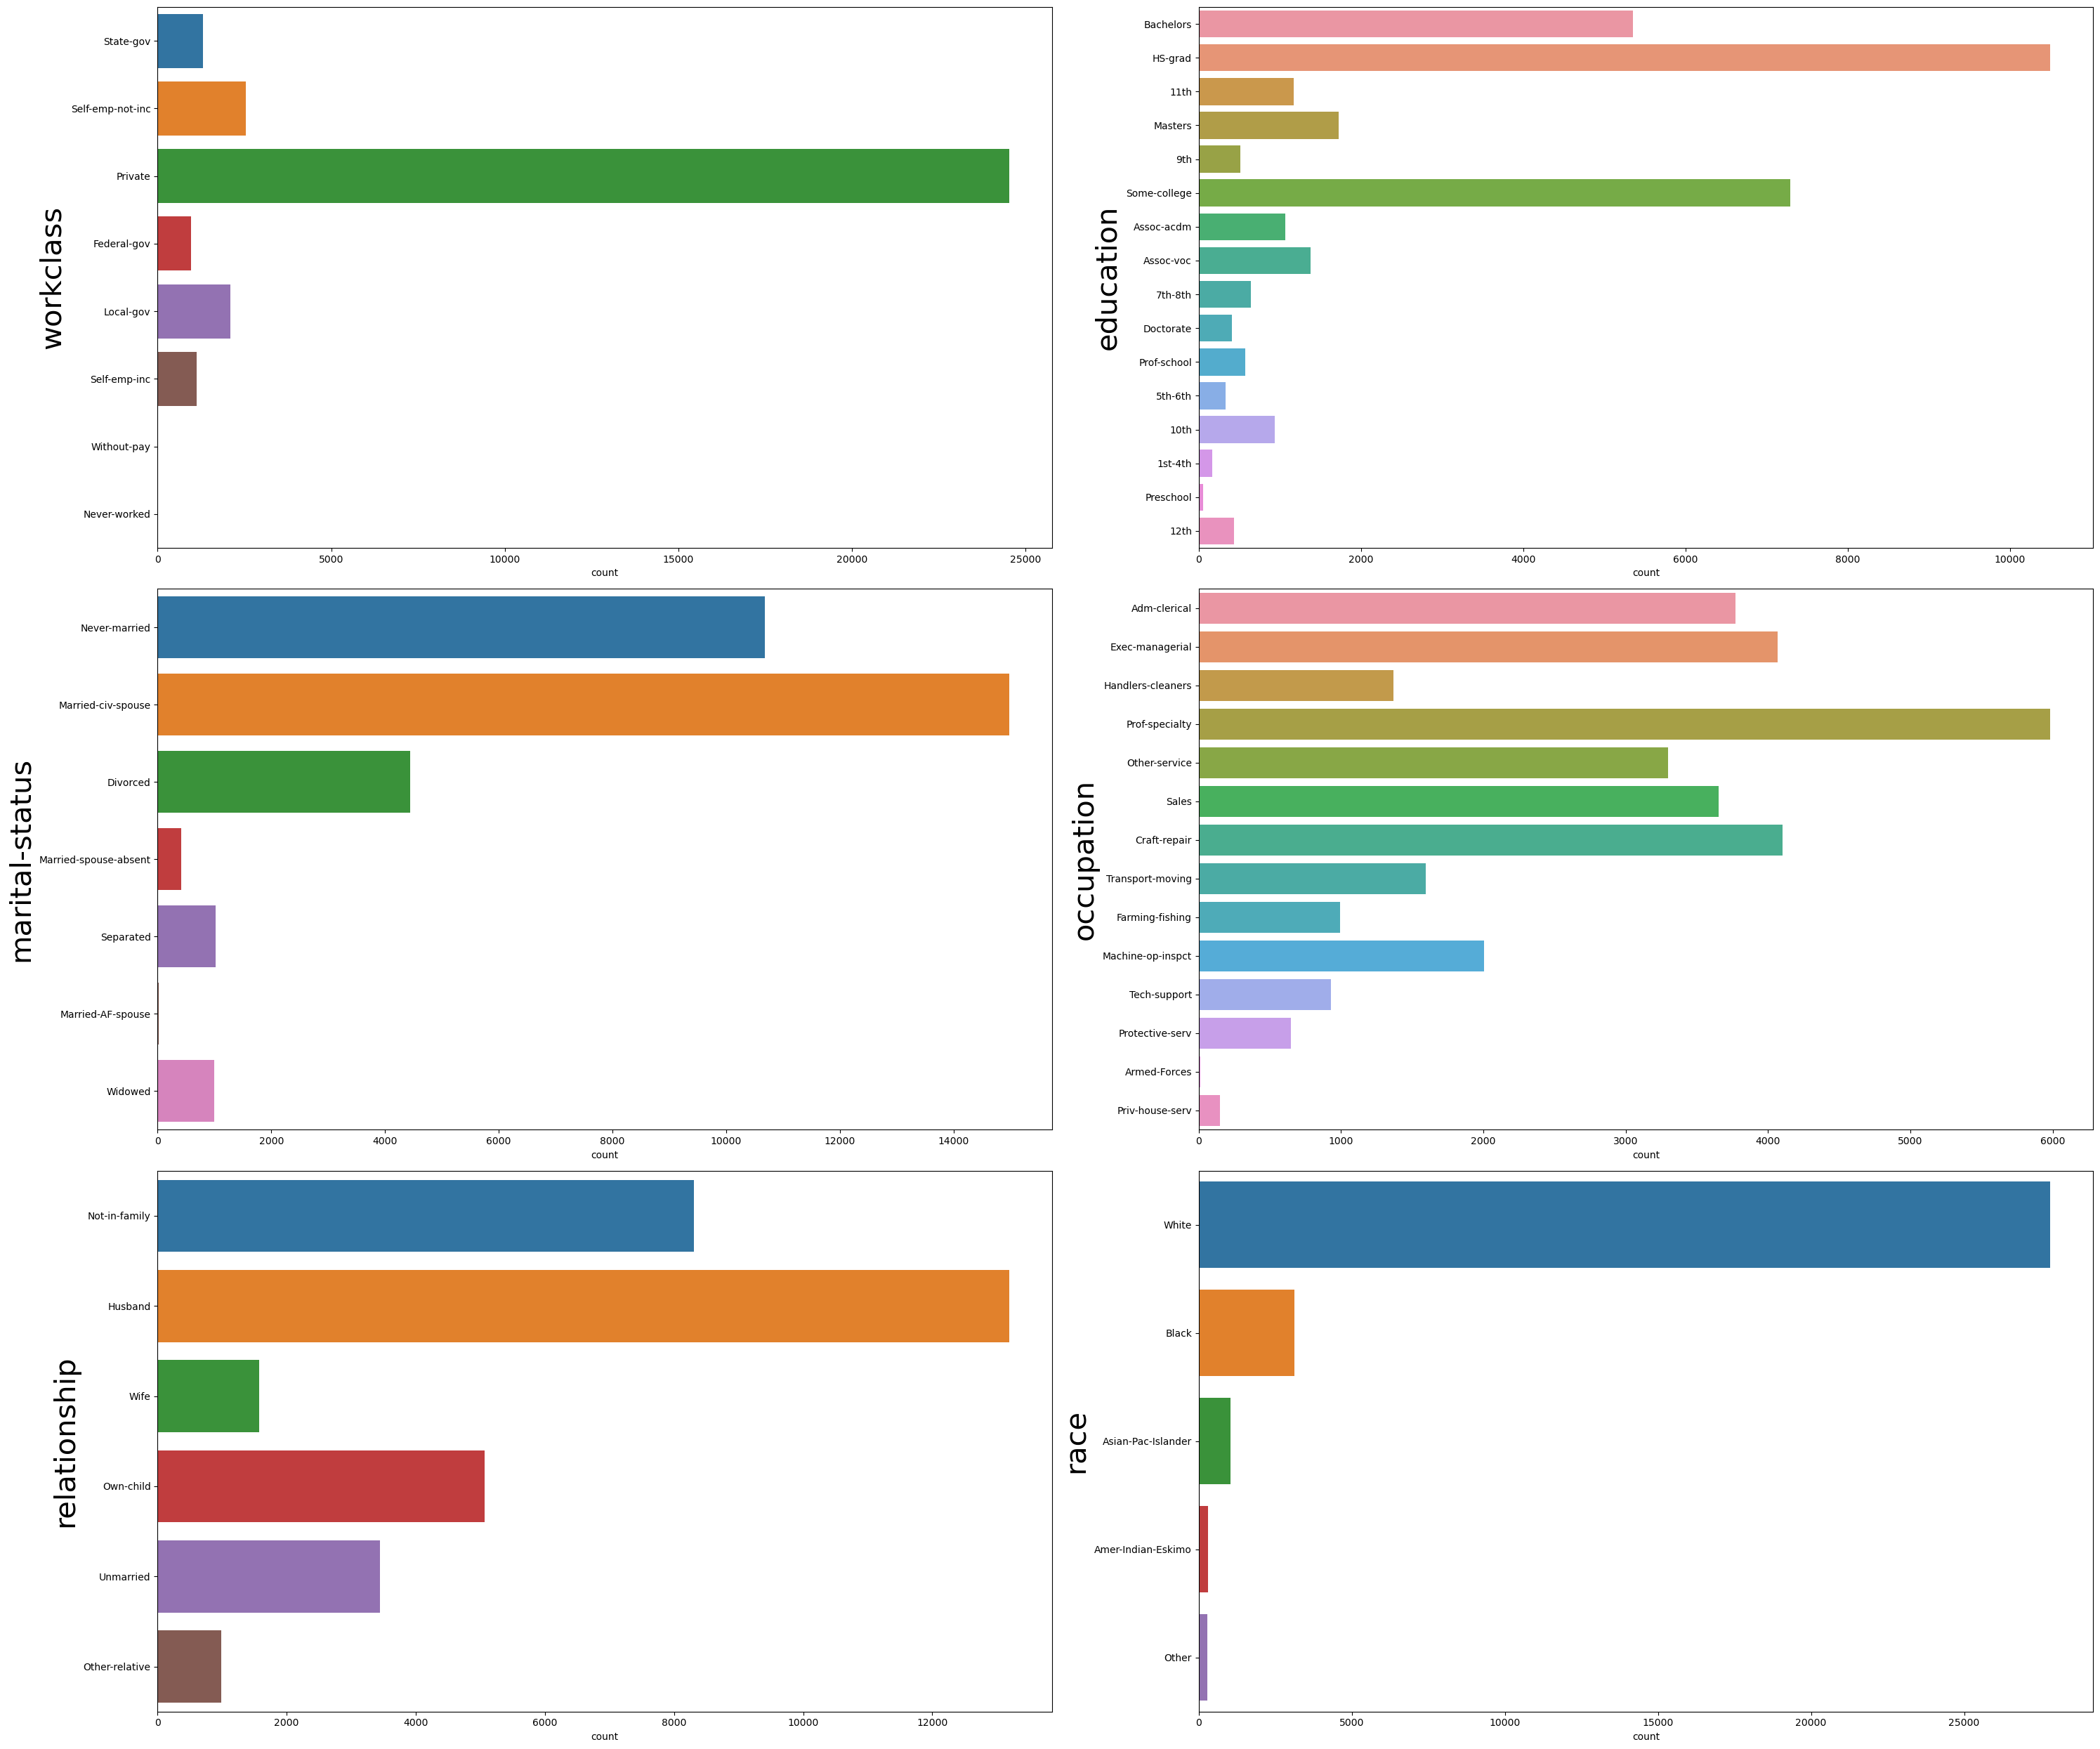

In [30]:
categoric_features = data.select_dtypes(include='object')
fig, ax = plt.subplots(3, 2, figsize=(30,25))
for variable, subplot in zip(categoric_features, ax.flatten()):
    countplot = sns.countplot(y=data[variable], ax=subplot )
    countplot.set_ylabel(variable, fontsize = 30)
plt.tight_layout()   
plt.show()

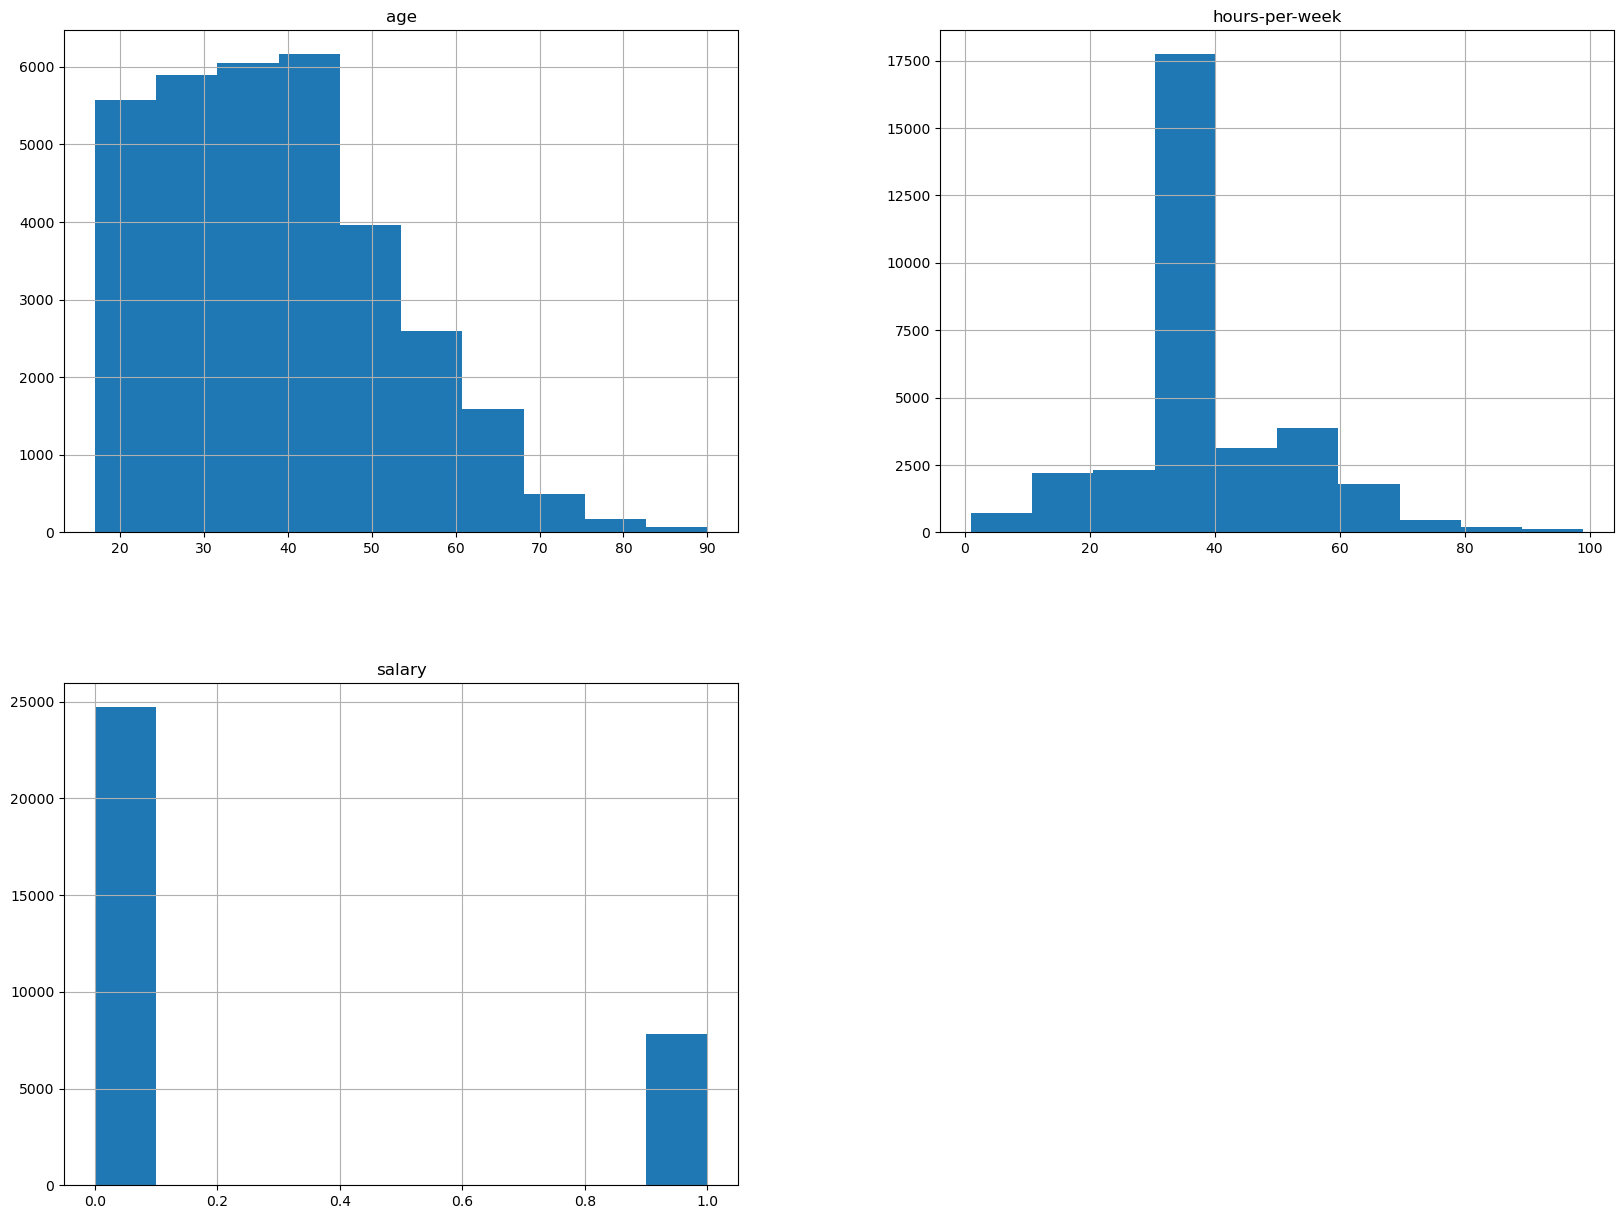

In [31]:
freqgraph=data.select_dtypes(include=['float','int'])
freqgraph.hist(figsize=(20,15))
plt.show()

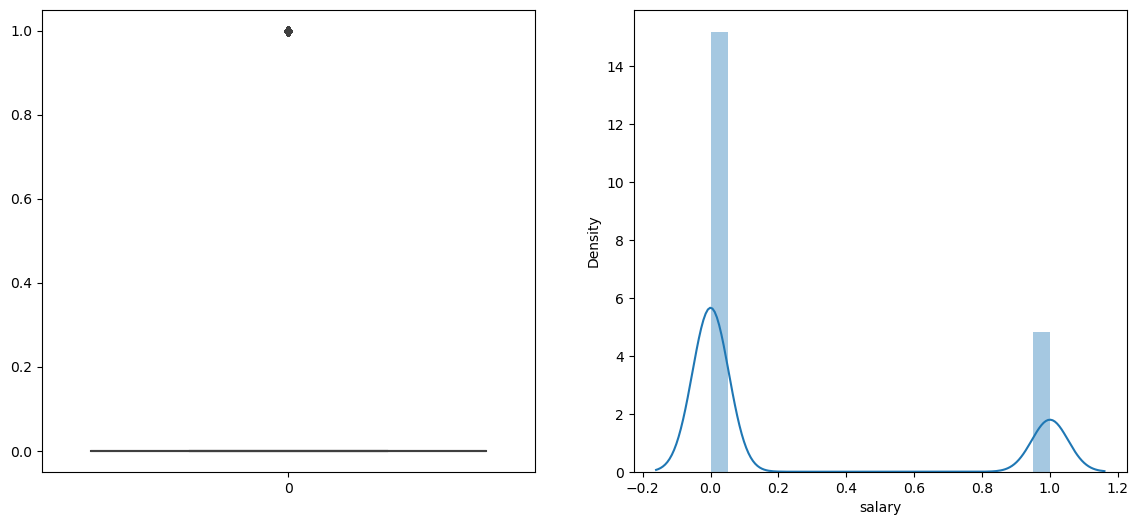

In [32]:
#distributino of salary
#impossibly slow to run plt.hist!
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data.salary)
plt.subplot(1, 2, 2)
sns.distplot(data.salary, bins = 20)
plt.show()

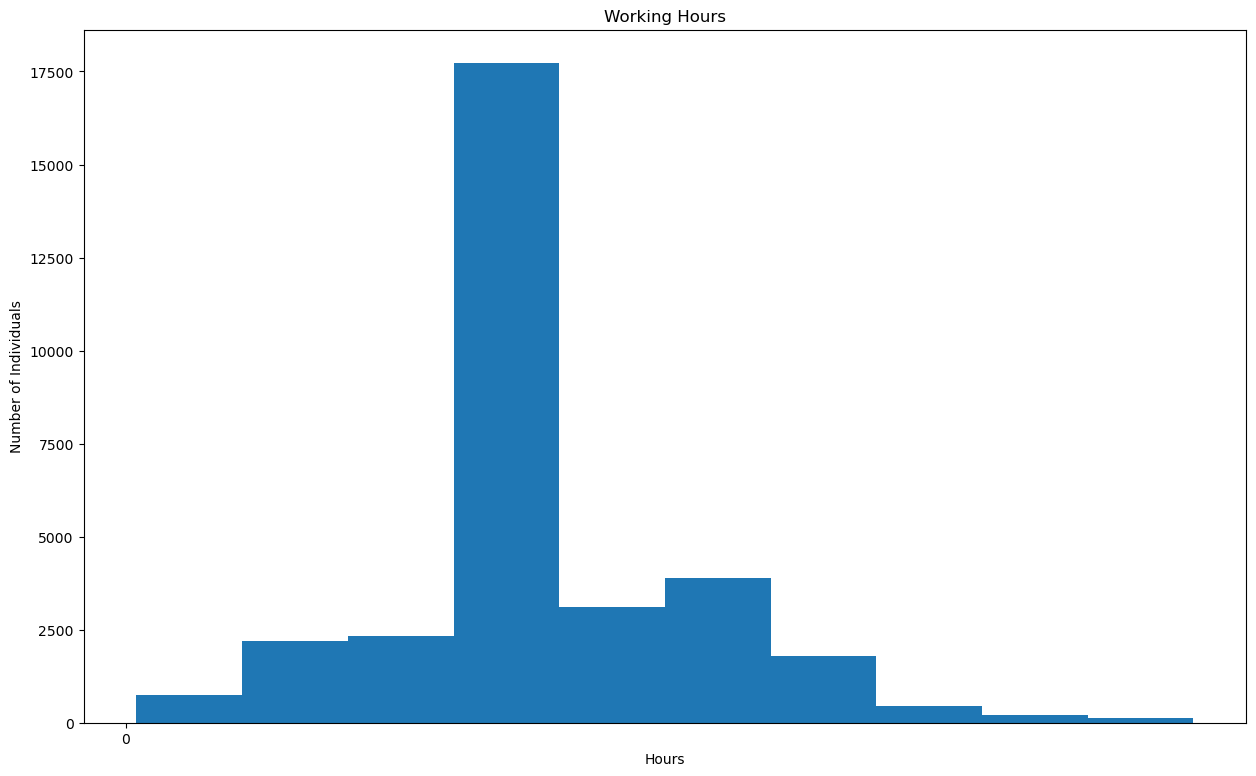

In [33]:
plt.hist(data['hours-per-week'])
plt.xlabel('Hours')
plt.ylabel('Number of Individuals')
plt.xticks(np.arange(0,11,11))
plt.title('Working Hours')
plt.show()

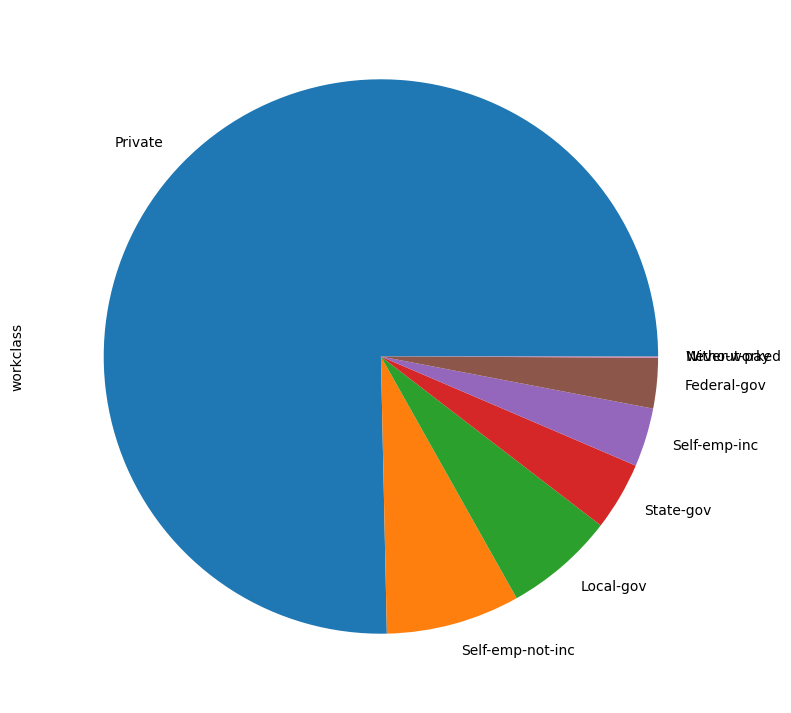

In [34]:
#checking workclass

data['workclass'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (5,5)
plt.show()

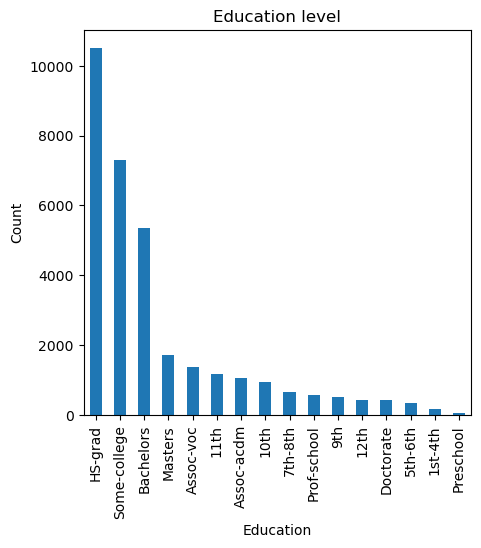

In [35]:
#checking education

data['education'].value_counts().plot(kind = 'bar')
plt.xlabel('Education')
plt.ylabel('Count')
plt.rcParams['figure.figsize'] = (10,10)
plt.title('Education level')
plt.show()

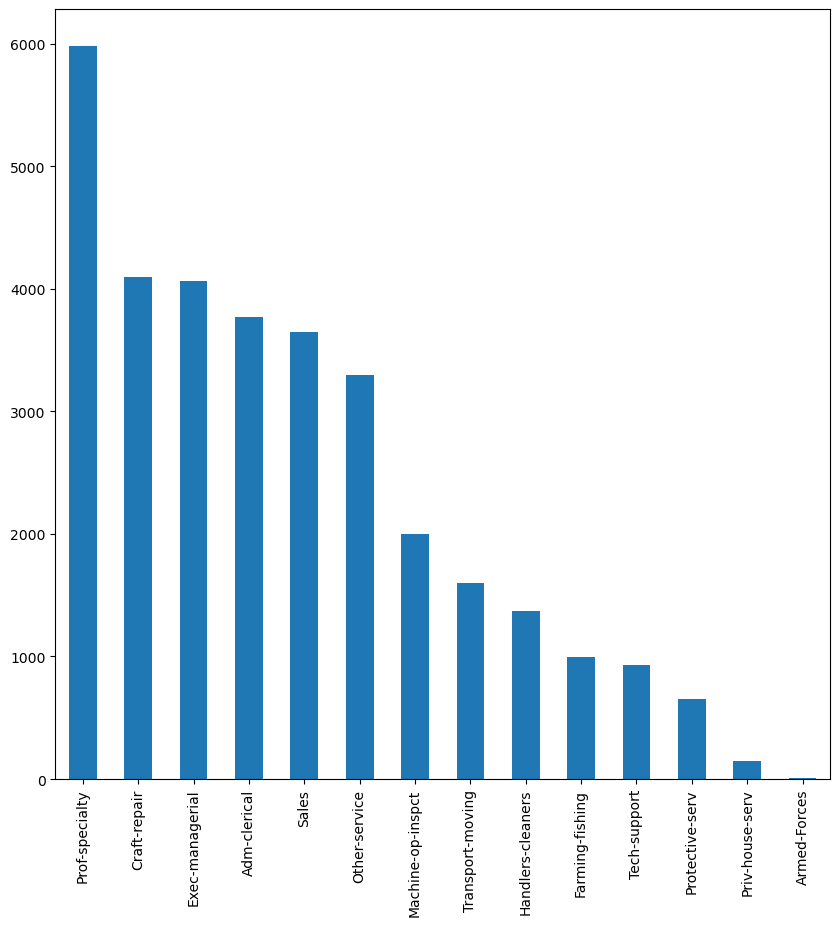

In [36]:
#checking occupation

data['occupation'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

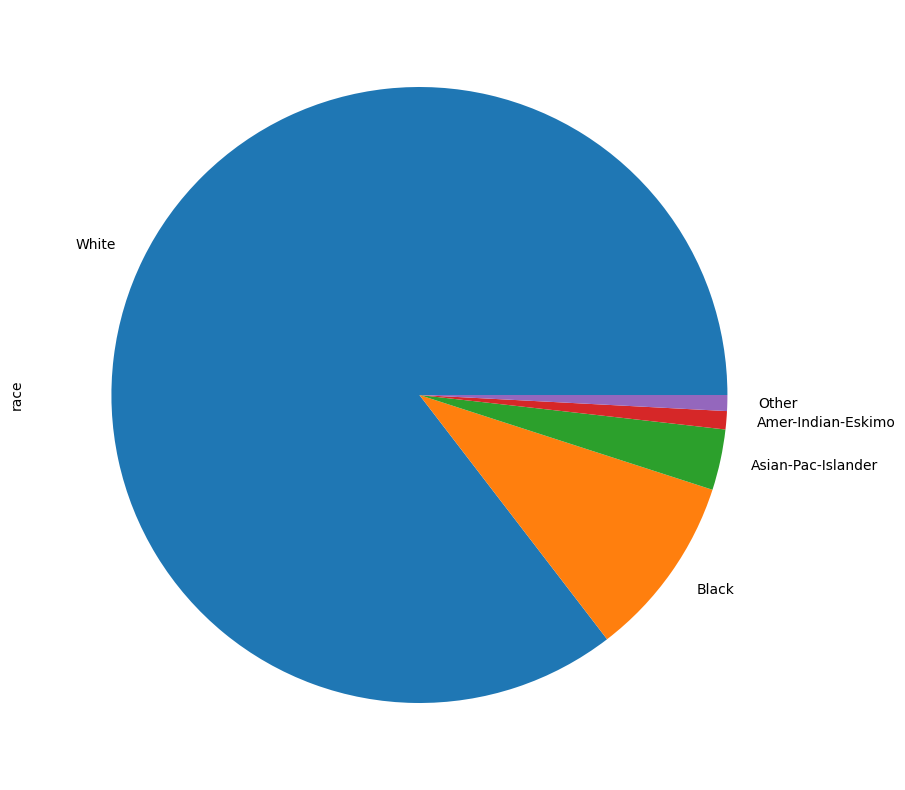

In [37]:
#Checking race

data['race'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (4.8,4.8)
plt.show()

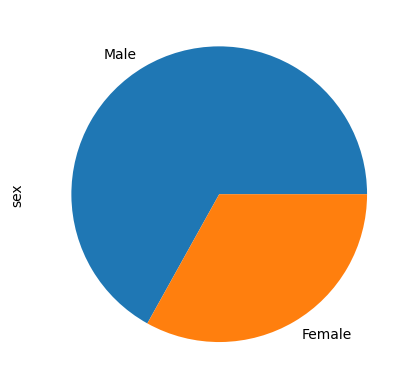

In [38]:
#Checking sex

data['sex'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

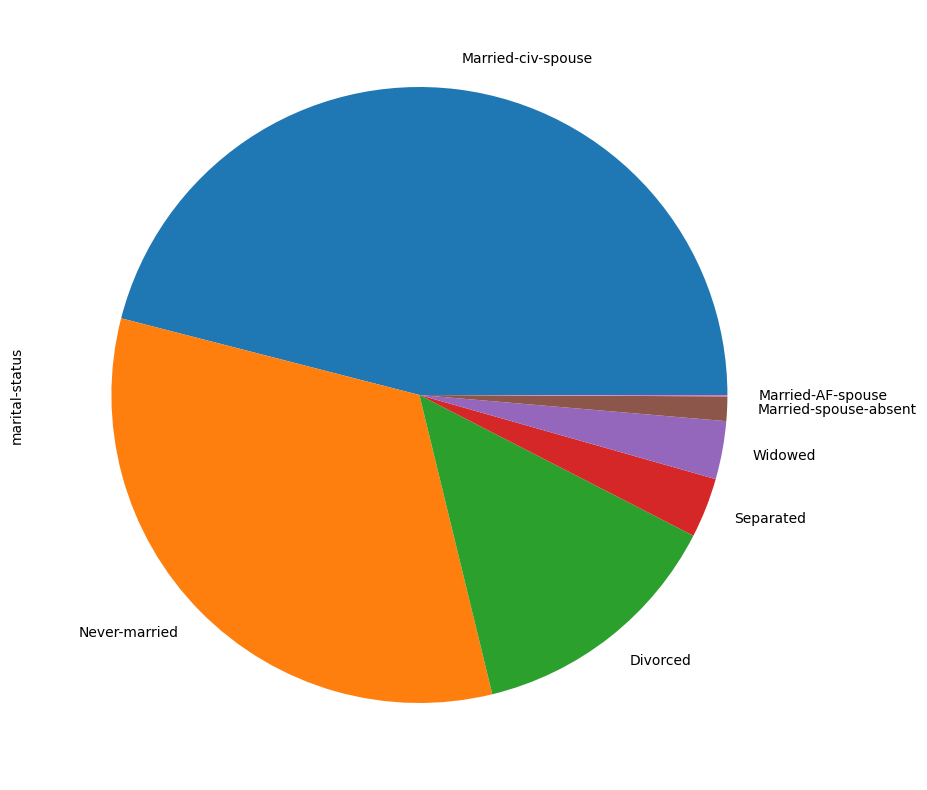

In [39]:
#checking marital-status

data['marital-status'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (6,6)
plt.show()

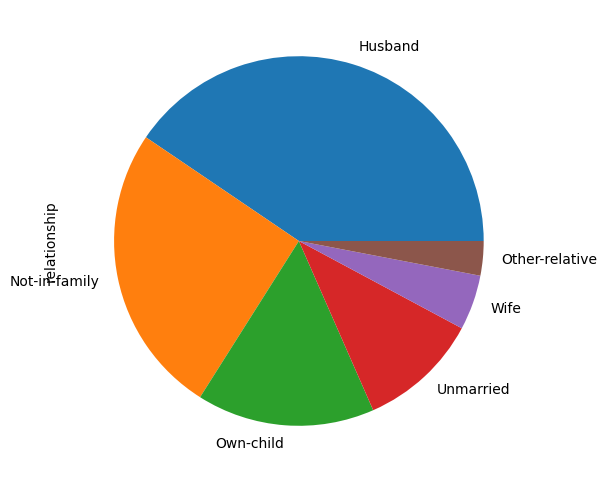

In [40]:
#checking relationship

data['relationship'].value_counts().plot(kind = 'pie')
plt.rcParams['figure.figsize'] = (9,12)
plt.show()

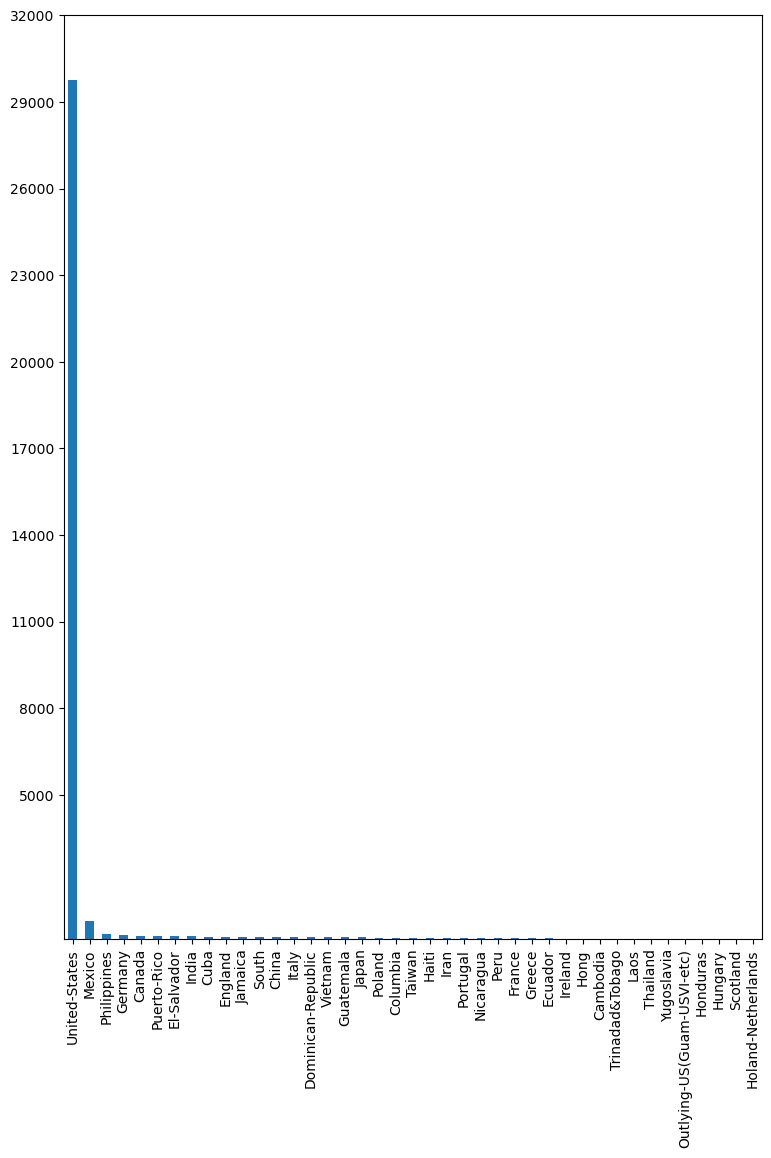

In [41]:
#checking native-country

data['native-country'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (10,10)
plt.yticks(np.arange(5000,33000,3000))
plt.show()

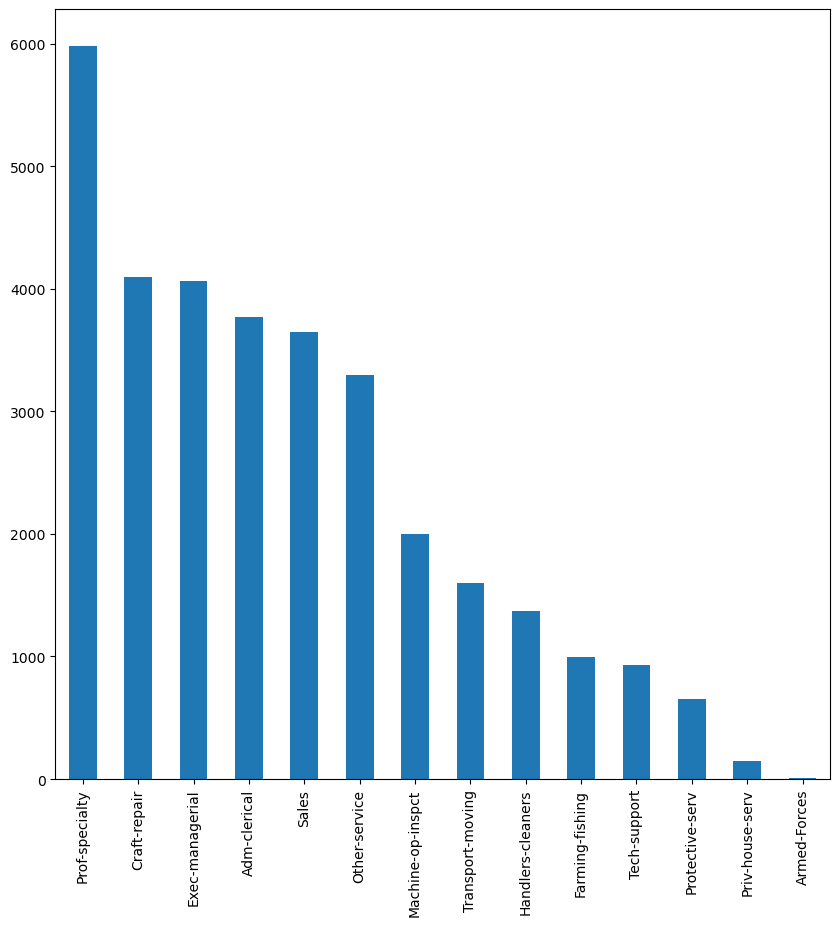

In [42]:
#checking occupation

data['occupation'].value_counts().plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (10,10)
plt.show()

In [43]:
#Visualising libraries
import plotly.express as px
import seaborn as sns
fig = px.scatter(data, x="age", y="hours-per-week")
fig.show()

### Label Encoding
Often in machine learning, we want to convert categorical variables into some type of numeric format that can be readily used by algorithms.

One way to do this is through label encoding, which assigns each categorical value an integer value based on alphabetical order.

In [44]:
from sklearn.preprocessing import LabelEncoder
column = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
le = LabelEncoder()

for col in column:
    data[col] = le.fit_transform(data[col])
data

age  workclass  education  marital-status  occupation  relationship  \
0       39          6          9               4           0             1   
1       50          5          9               2           3             0   
2       38          3         11               0           5             1   
3       53          3          1               2           5             0   
4       28          3          9               2           9             5   
...    ...        ...        ...             ...         ...           ...   
32556   27          3          7               2          12             5   
32557   40          3         11               2           6             0   
32558   58          3         11               6           0             4   
32559   22          3         11               4           0             3   
32560   52          4         11               2           3             5   

       race  sex  hours-per-week  native-country  salary  
0         4    1              40              38       0  
1         4    1              13              38       0  
2         4    1              40              38       0  
3         2    1              40              38       0  
4         2    0              40               4       0  
...     ...  ...             ...             ...     ...  
32556     4    0              38              38       0  
32557     4    1              40              38       1  
32558     4    0              40              38       0  
32559     4    1              20              38       0  
32560     4    0              40              38       1  

[32561 rows x 11 columns]

In [45]:
data.shape

(32561, 11)

In [46]:
X=data.drop('salary',axis=1)
y=data['salary']

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,Y_train)
predictions=model.predict(X_test)

In [49]:
print('The mean squared error values is:',mean_squared_error(Y_test,predictions))
print('the r squared value is',r2_score(Y_test,predictions))

The mean squared error values is: 0.15652705945874426
the r squared value is 0.14479022372396688


### Standard Scaling

* Standard Scaler is another popular scaler that is very easy to understand and implement.
* For each feature, the Standard Scaler scales the values such that the mean is 0 and the standard deviation is 1(or the variance).

         x_scaled = x – mean/std_dev
* However, Standard Scaler assumes that the distribution of the variable is normal. Thus, in case, the variables are not normally distributed, we either choose a different scaleror first, convert the variables to a normal distribution and then apply this scaler.
* Implementing the standard scaler is much similar to implementing a min-max scaler.

In [50]:
# Feature scaling on training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X[['age',  'hours-per-week']])
input_scaled = scaler.transform(X[['age',  'hours-per-week']])
scaled_data = pd.DataFrame(input_scaled,columns=['age',  'hours-per-week'])

### Train-test splitting

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,Y_train)
predictions=model.predict(X_test)

In [53]:
print('The mean squared error values is:',mean_squared_error(Y_test,predictions))
print('the r squared value is',r2_score(Y_test,predictions))

The mean squared error values is: 0.15652705945874426
the r squared value is 0.14479022372396688


In [54]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score

In [55]:
print( 'The mean squared error value is:',mean_squared_error(y_test,predictions))
print( 'The r squared value is:',r2_score(y_test,predictions))      

The mean squared error value is: 0.15652705945874426
The r squared value is: 0.14479022372396688


### Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
#Defining Logistic Regression Model & fitting train data
lr=LogisticRegression()
logit_model=lr.fit(X_train,y_train)
#Predicting the result of test data using obtained model
y_pred_logit=logit_model.predict(X_test)

In [57]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
precision_score(y_test,y_pred_logit)

0.46996466431095407

In [58]:
accuracy_score(y_test,y_pred_logit)

0.7535697835099032

### Lazy Predict

In [59]:
### importing lazypredict library
import lazypredict
### importing LazyClassifier for classification problem
from lazypredict.Supervised import LazyClassifier

In [60]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)

In [61]:
## fitting data in LazyClassifier
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████| 29/29 [03:46<00:00,  7.80s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.84               0.76     0.76      0.84   
LGBMClassifier                     0.85               0.76     0.76      0.84   
AdaBoostClassifier                 0.84               0.75     0.75      0.83   
QuadraticDiscriminantAnalysis      0.76               0.75     0.75      0.77   
RandomForestClassifier             0.82               0.73     0.73      0.82   
GaussianNB                         0.76               0.73     0.73      0.77   
LabelSpreading                     0.80               0.73     0.73      0.80   
LabelPropagation                   0.80               0.72     0.72      0.80   
KNeighborsClassifier               0.81               0.72     0.72      0.81   
ExtraTreesClassifier               0.81               0.72     0.72      0.81   
BaggingClassifier           

In [62]:
models

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.84               0.76     0.76      0.84   
LGBMClassifier                     0.85               0.76     0.76      0.84   
AdaBoostClassifier                 0.84               0.75     0.75      0.83   
QuadraticDiscriminantAnalysis      0.76               0.75     0.75      0.77   
RandomForestClassifier             0.82               0.73     0.73      0.82   
GaussianNB                         0.76               0.73     0.73      0.77   
LabelSpreading                     0.80               0.73     0.73      0.80   
LabelPropagation                   0.80               0.72     0.72      0.80   
KNeighborsClassifier               0.81               0.72     0.72      0.81   
ExtraTreesClassifier               0.81               0.72     0.72      0.81   
BaggingClassifier                  0.81               0.72     0.72      0.80   
NearestCentroid                    0.67               0.72     0.72      0.69   
SVC                                0.81               0.71     0.71      0.80   
BernoulliNB                        0.74               0.71     0.71      0.75   
DecisionTreeClassifier             0.77               0.69     0.69      0.77   
ExtraTreeClassifier                0.77               0.68     0.68      0.77   
CalibratedClassifierCV             0.77               0.57     0.57      0.72   
LogisticRegression                 0.76               0.57     0.57      0.72   
LinearDiscriminantAnalysis         0.76               0.56     0.56      0.71   
Perceptron                         0.66               0.55     0.55      0.66   
LinearSVC                          0.76               0.54     0.54      0.70   
RidgeClassifier                    0.75               0.52     0.52      0.68   
RidgeClassifierCV                  0.75               0.52     0.52      0.68   
SGDClassifier                      0.76               0.50     0.50      0.65   
DummyClassifier                    0.76               0.50     0.50      0.65   
PassiveAggressiveClassifier        0.67               0.48     0.48      0.64   

                               Time Taken  
Model                                      
XGBClassifier                        0.76  
LGBMClassifier                       0.38  
AdaBoostClassifier                   0.84  
QuadraticDiscriminantAnalysis        0.06  
RandomForestClassifier               3.73  
GaussianNB                           0.04  
LabelSpreading                     118.78  
LabelPropagation                    43.53  
KNeighborsClassifier                 1.85  
ExtraTreesClassifier                 2.70  
BaggingClassifier                    0.69  
NearestCentroid                      0.05  
SVC                                 34.44  
BernoulliNB                          0.04  
DecisionTreeClassifier               0.12  
ExtraTreeClassifier                  0.04  
CalibratedClassifierCV              12.88  
LogisticRegression                   0.11  
LinearDiscriminantAnalysis           0.18  
Perceptron                           0.06  
LinearSVC                            4.16  
RidgeClassifier                      0.15  
RidgeClassifierCV                    0.11  
SGDClassifier                        0.16  
DummyClassifier                      0.04  
PassiveAggressiveClassifier          0.07